<a href="https://colab.research.google.com/github/pboric/Project-7/blob/main/Travel_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travel Insurance Prediction

This notebook explores a dataset related to travel insurance and aims to predict whether an individual will purchase travel insurance. Here are the key steps covered:

1. **Data Exploration and Preprocessing**:
   - Descriptive statistics of age, annual income, family members, chronic diseases, and travel insurance status.
   - Handling missing values and outlier detection.
   - Visualizing distributions of numeric features (age, annual income, family members).
   - Analyzing categorical features (employment type, graduate status, chronic diseases, frequent flyers, travel abroad history).

2. **Statistical Inference**:
   - Hypothesis testing for age, income, and family size to understand their impact on travel insurance decisions.

3. **Model Selection and Evaluation**:
   - Three models (Logistic Regression, Random Forest, and SVM) are evaluated.
   - Balancing techniques (SMOTE and undersampling) are applied.
   - Hyperparameter tuning is performed using GridSearchCV.
   - Model performance metrics (precision, recall, F1-score, accuracy) are reported.

# About the Dataset

**Context**

A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.

The New Insurance Package Also Includes Covid Cover.

The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.

The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.

The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.

**Content**

Age- Age Of The Customer

Employment Type- The Sector In Which Customer Is Employed

GraduateOrNot- Whether The Customer Is College Graduate Or Not

AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]

FamilyMembers- Number Of Members In Customer's Family

ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.

FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]

TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

**Inspiration**

The Solution Offered By You May Be Used For Customer Specific Advertising Of The Package.

Exploratory Data Analysis Performed On The Data Would Help Find Interesting Insights.

Predict Whether A Given Customer Would Like To Buy The Insurance Package, Once The Corona Lockdown Ends And Travelling Resumes.

Your Work Could Probably Help Save Thousands Of Rupees Of A Family.


# Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')

# EDA

In [3]:
df = pd.read_csv('TravelInsurancePrediction.csv')

print("Dataset Information:")
display(df.info())

print("\nFirst few rows of the dataset:")
display(df.head())

print("\nBasic statistical summary:")
display(df.describe())

print("\nMissing values:")
display(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


None


First few rows of the dataset:


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0



Basic statistical summary:


,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000



Missing values:


Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Statistical Summary

- **Age**: The average age is approximately **29.65** years with a standard deviation of **2.91** years.
- **Annual Income**: The average annual income is around **932,763** with a standard deviation of **376,855**.
- **Family Members**: The average number of family members is about **4.75** with a standard deviation of **1.61**.
- **Chronic Diseases**: Around **27.8%** of the individuals have chronic diseases.
- **Travel Insurance**: About **35.7%** of the individuals have travel insurance.

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
#separate categorical and numeric features
df["ChronicDiseases"]= df["ChronicDiseases"].map({0: "No", 1: "Yes"})
df["TravelInsurance"] = df["TravelInsurance"].map({0: "not"
                        "purchased", 1: "purchased"})

cats = []
nums = []
for i in df.columns:
  if df[i].dtype=='object':
    cats.append(i)
  else:
    nums.append(i)
print('cats = ',cats)
print('nums = ',nums)

cats =  ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
nums =  ['Age', 'AnnualIncome', 'FamilyMembers']


## Outlier values on numeric features

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


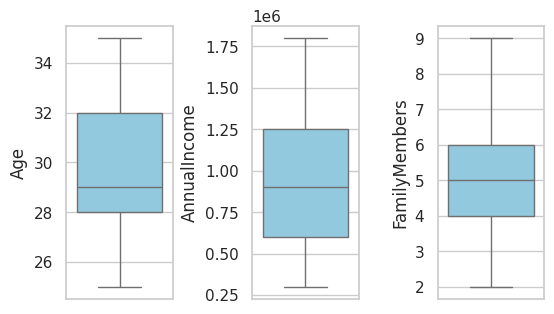

In [ ]:
plt.figure(figsize=(20,12))
for i in range(0, len(nums)) :
  plt.subplot(4,11, i+2)
  sns.boxplot (y=df [nums[i]], color='skyblue', orient='v')
plt.tight_layout ()
df.describe()

According to the boxplot graph, there are no outlier values.

## Distributions of numeric features

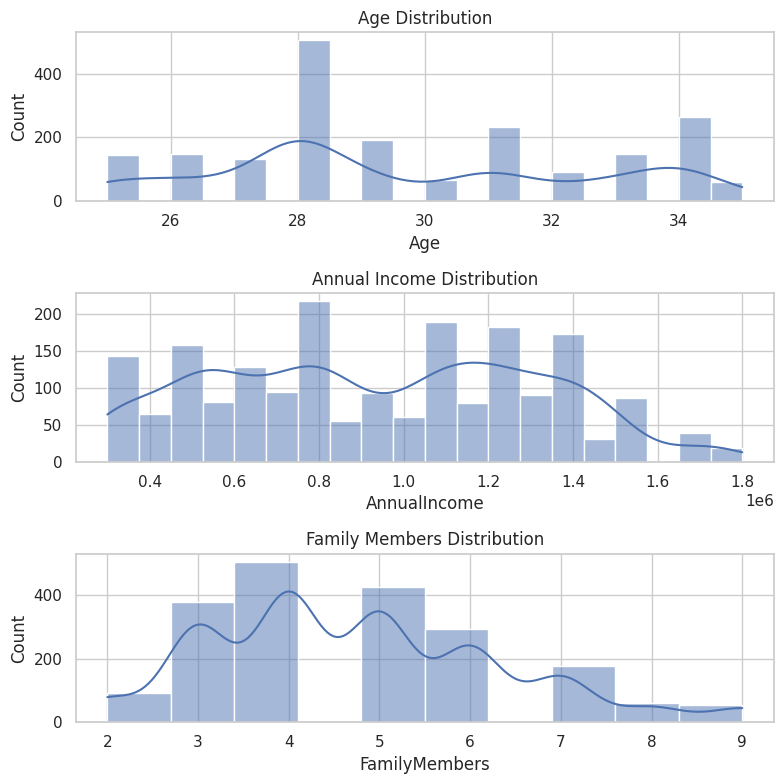

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(8, 8))
sns.histplot(df['Age'], bins=20,
             ax=axes[0], kde=True).set_title('Age Distribution')
sns.histplot(df['AnnualIncome'],
             bins=20, ax=axes[1],
             kde=True).set_title('Annual Income Distribution')
sns.histplot(df['FamilyMembers'],
             bins=10, ax=axes[2],
             kde=True).set_title('Family Members Distribution')

plt.tight_layout()
plt.show()

**Age Distribution**:
  - Mostly normally distributed

**Annual Income Distribution**:
   - The distribution appears to be right-skewed, multimodal, with peaks around 0.8 million and 1.2 million.

**Family Members Distribution**:
   - The distribution is normal and slightly left-skewed, with most values at 4 family members.

## Imbalance percentages of categorical features

Imbalance percentage of Employment Type: 71.31%
Imbalance percentage of GraduateOrNot: 85.15%
Imbalance percentage of ChronicDiseases: 72.22%
Imbalance percentage of FrequentFlyer: 79.01%
Imbalance percentage of EverTravelledAbroad: 80.88%
Imbalance percentage of TravelInsurance: 64.27%


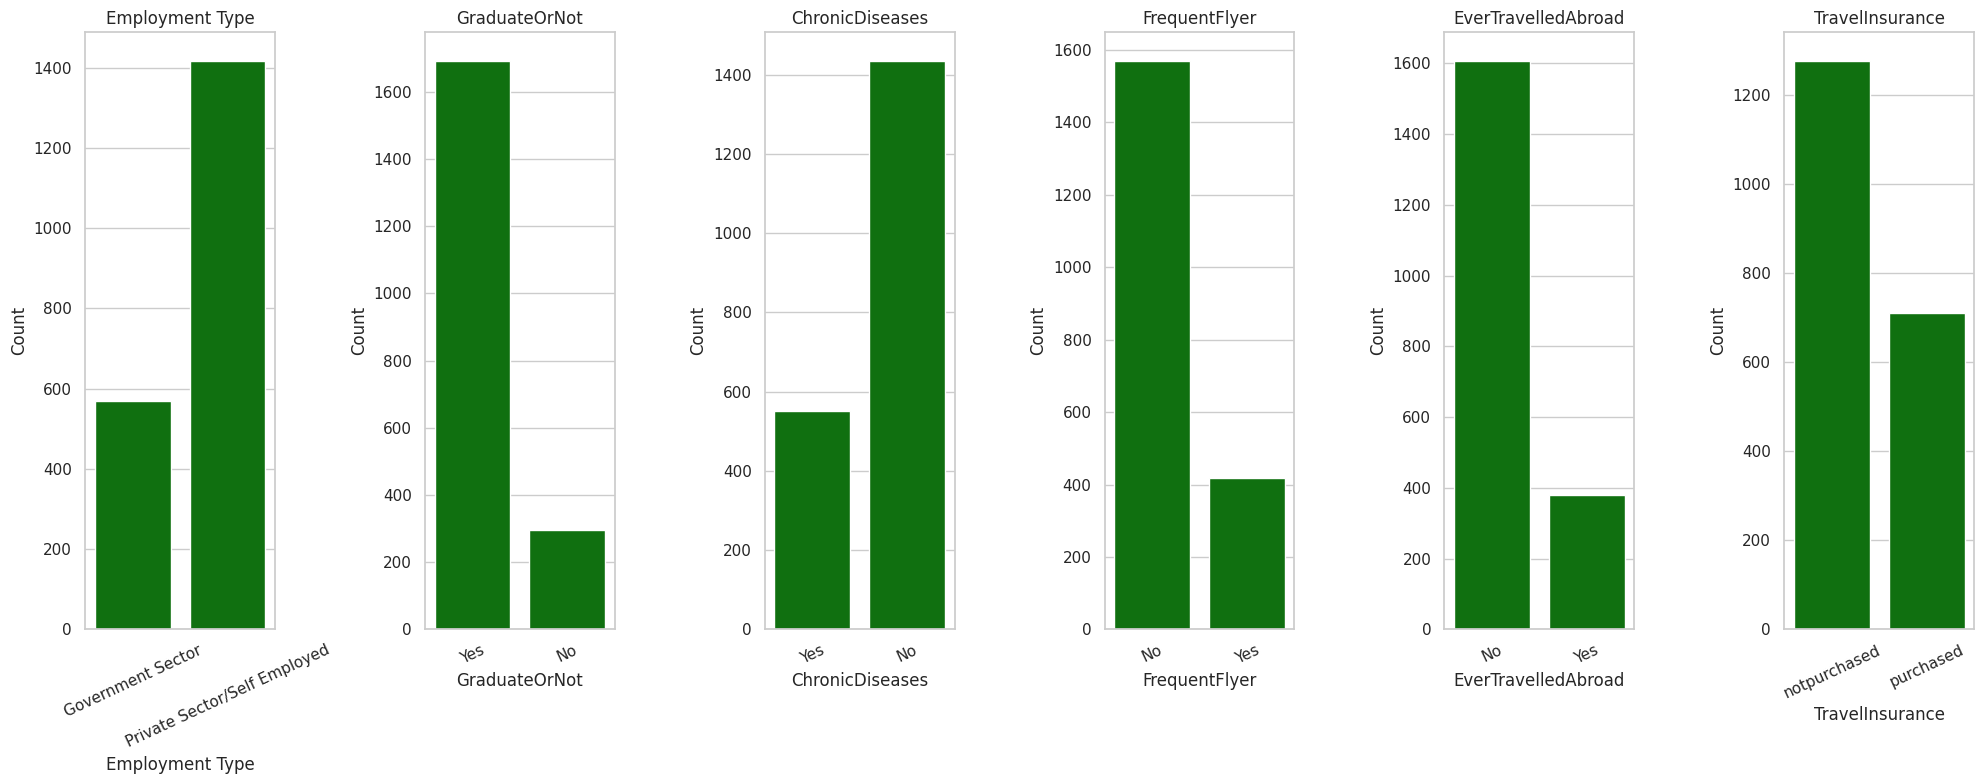

In [ ]:
plt.figure(figsize=(20,8))
for i in range(0, len(cats)):
  plt.subplot(1,len(cats), i+1)
  sns.countplot(x=df[cats[i]], color='green')

  plt.ylabel('Count', rotation=90)

  plt.title(cats[i])

  plt.xticks(rotation=25)

  plt.tight_layout()


for feature in cats:
    value_counts = df[feature].value_counts()
    imbalance_percentage = (value_counts[0] / value_counts.sum()) * 100
    print(f"Imbalance percentage of {feature}: {imbalance_percentage:.2f}%")

The categorical features are indeed imbalanced and balancing techniques should be applied before modeling to mitigate bias, poor generalization and evaluation metrics.

## Distributions of a **numerical** features based on whether an individual purchased travel insurance

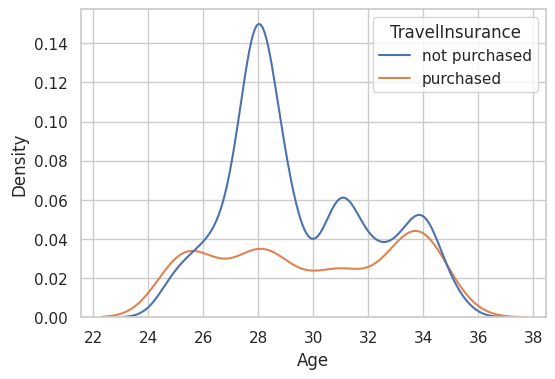

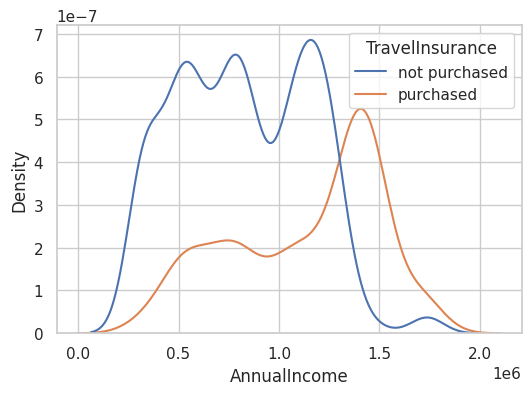

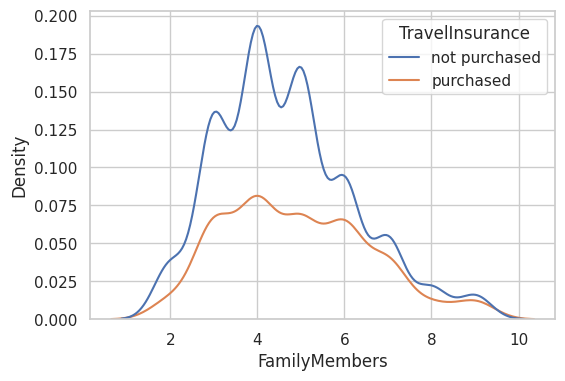

In [ ]:
for feature in nums:
  fig, ax = plt.subplots(figsize=(6,4))
  sns.kdeplot(data=df, hue='TravelInsurance', x=feature, ax=ax)
  plt.show()

**Age Distribution**:
   - Individuals who purchase travel insurance tend to fall into two prominent age groups:
     - Around **28 years old**: This is the primary peak.
     - Around **34 years old**: A smaller peak.
   - Non-purchasers show a more uniform distribution across ages, with a slight increase in density around 28.

**Annual Income Influence**:
   - The KDE plot for annual income reveals that individuals with **higher annual incomes** are more likely to purchase travel insurance.
   - The peak for the "purchased" group occurs at approximately **1.5 million** (assuming the x-axis is in millions).

**Family Size Impact**:
   - The KDE plot for family members suggests that:
     - Individuals with **around 2 to 3 family members** are more likely to have not purchased travel insurance.
     - For those who have purchased travel insurance, there is a broader spread across the number of family members, with a less pronounced peak.

**Business Implications**:
   - Income level significantly influences travel insurance decisions.
   - Family size also plays a role, with smaller families showing different behavior.
   - Businesses can tailor their offerings and marketing strategies based on these insights.

The best separation in data is for **Annual Income**, the clearer the data separation, the more it will affect the target

These observations are based on the KDE plots, and further analysis or statistical tests may be needed to validate them.


## Distribution of different **categorical** features based on whether individuals purchased travel insurance

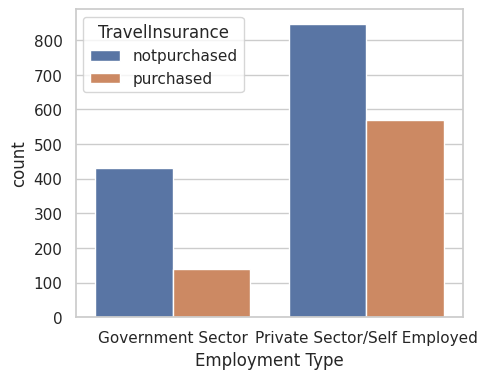

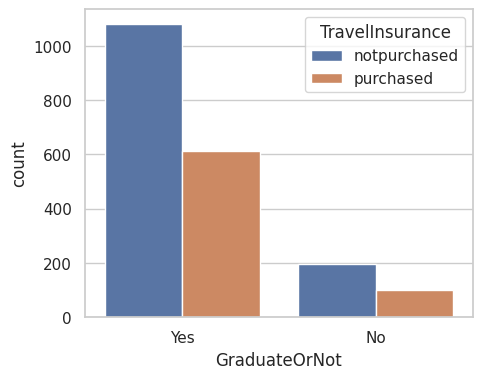

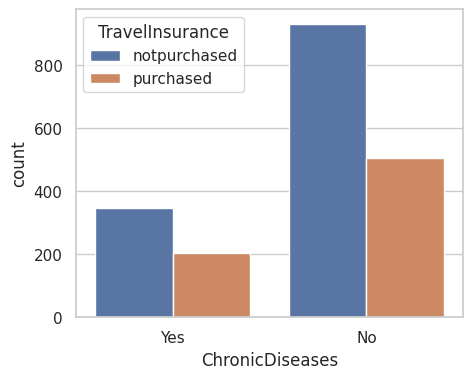

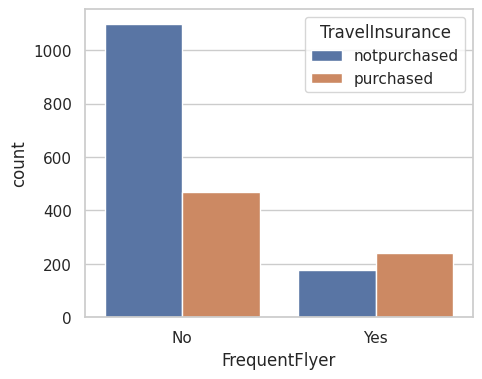

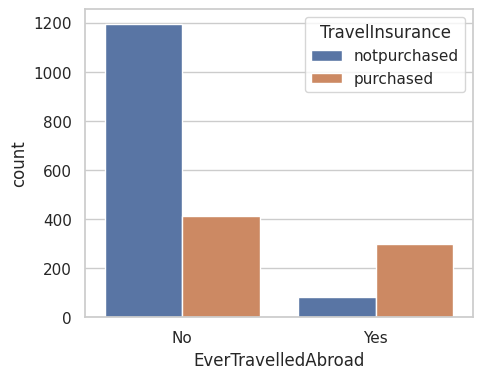

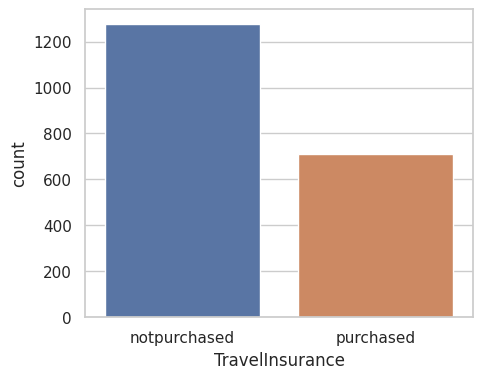

In [ ]:
target = 'TravelInsurance'
for feature in cats:
    fig, ax = plt.subplots(figsize=(5,4))
    sns.countplot(x=feature, hue=target, data=df, ax=ax)
    plt.show()

**Employment Type**:
   - Individuals in the **Private Sector/Self Employed** category show a higher count of not purchasing travel insurance compared to those in the **Government Sector**.
   - The difference is more pronounced for government sector employees.

**Graduate Status**:
   - Graduates are more likely to purchase travel insurance than non-graduates.
   - The gap between the two groups is significant.

**Chronic Diseases**:
   - Individuals without chronic diseases tend to purchase travel insurance more frequently.
   - Those with chronic diseases have a lower count of travel insurance purchases.

**Frequent Flyers**:
   - Frequent flyers are more inclined to buy travel insurance.

**Travel Abroad History**:
   - Individuals who have traveled abroad before are much more likely to purchase travel insurance.

**Overall Trend**:
   - Across all categories, there is a higher count of individuals not purchasing travel insurance.

These insights can guide marketing strategies and product offerings for travel insurance companies. It's essential to target graduates, frequent flyers, and those with a history of international travel. Additionally, addressing concerns related to chronic diseases may improve sales.

These observations are based on the provided data and may not represent the entire population.

## Relationships between variables

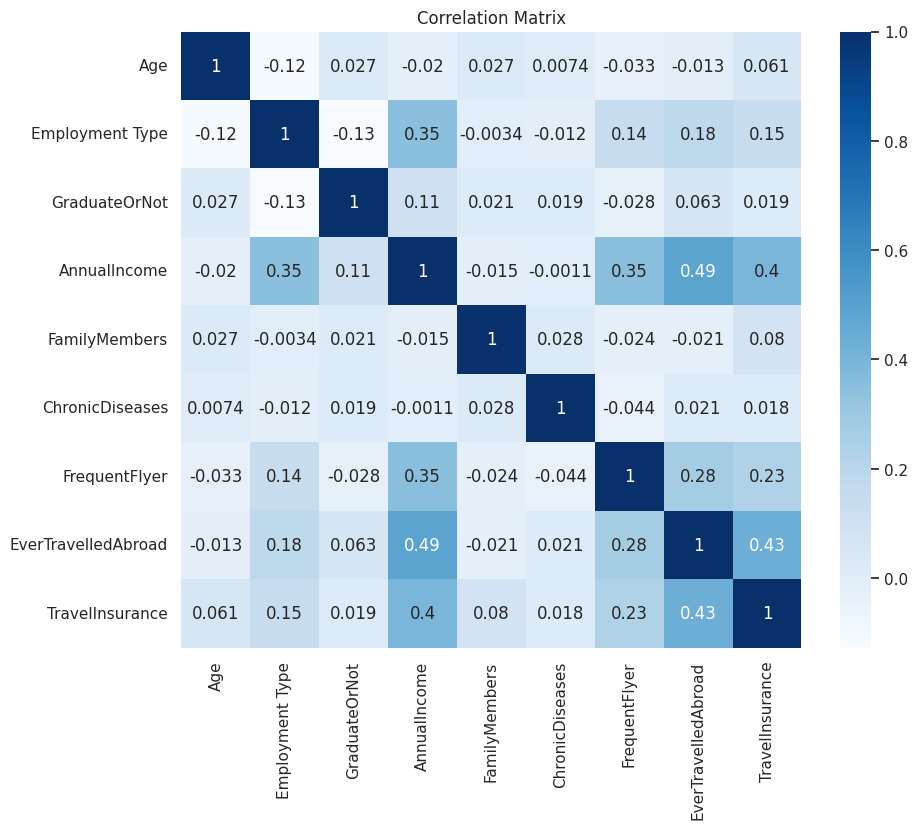

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
   encoder = LabelEncoder()
   df[col] = encoder.fit_transform(df[col])

plt.figure(figsize=(10, 8))

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

**Travel Insurance and Employment Type**:
   - The variable Travel Insurance has a moderately positive correlation with **Employment Type**.
   - Individuals in certain employment sectors (e.g., private sector/self-employed) might be more likely to purchase travel insurance.

**Travel Insurance and Graduate Status**:
   - There is a moderate positive correlation between **Travel Insurance** and **Graduate Or Not**.
   - Graduates are more inclined to buy travel insurance.

**Chronic Diseases and Age**:
   - **Chronic Diseases** has a moderate positive correlation with Age.
   - Older individuals might have more chronic diseases.

**Annual Income and Other Variables**:
   - **Annual Income** has strong positive correlations with **Employment Type**, **Graduate Or Not**, and **Family Members**.
   - These factors could be associated with higher annual income.

**No Strong Negative Correlations**:
   - Interestingly, there are no strong negative correlations present in this matrix.


Based on the correlation table data, it can be seen that Annual Income and Ever Travelled Abroad features are the only ones somewhat correlated with Travel Insurance decision.

# Statistical inference

Target Population: individuals who are potential customers for travel insurance.


1. **Age Hypothesis**:
   - **H0**: There is no significant difference in travel insurance purchases across different age groups.
   - **Ha**: Travel insurance purchase behavior varies significantly among different age groups.

In [32]:
sample_mean = 28.5
population_mean = 30
population_std = 5
sample_size = 1987

se_diff = population_std / (sample_size**0.5)

z_score = (sample_mean - population_mean) / se_diff

alpha = 0.05

critical_z = stats.norm.ppf(1 - alpha/2)

lower_bound = sample_mean - critical_z * se_diff
upper_bound = sample_mean + critical_z * se_diff

if abs(z_score) > critical_z:
    result = "Reject the H0 - Travel insurance purchase varies"
    " significantly among different age groups"
else:
    result = "Fail to reject the H0 - There is no significant"
    " difference in travel insurance purchases across different age groups"

print(f"Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")
print(result)


Confidence Interval: (28.28, 28.72)
Reject the H0 - Travel insurance purchase varies



2. **Income Hypothesis**:
   - **H0**: There is no association between annual income and travel insurance purchases.
   - **Ha**: Individuals with higher annual incomes are more likely to purchase travel insurance.



In [33]:
purchasers = df[df['TravelInsurance'] == 1]['AnnualIncome']
non_purchasers = df[df['TravelInsurance'] == 0]['AnnualIncome']

mean_purchasers = purchasers.mean()
mean_non_purchasers = non_purchasers.mean()
std_purchasers = purchasers.std()
std_non_purchasers = non_purchasers.std()

se_diff = ((std_purchasers**2) / len(purchasers) + (std_non_purchasers**2) / len(non_purchasers))**0.5

z_score = (mean_purchasers - mean_non_purchasers) / se_diff

alpha = 0.05

critical_z = stats.norm.ppf(1 - alpha/2)

confidence_interval = (mean_purchasers - mean_non_purchasers) + critical_z * se_diff

lower_bound = mean_purchasers - critical_z * se_diff
upper_bound = mean_purchasers + critical_z * se_diff

print(f"Confidence Interval: {confidence_interval:.2f}")
print(f"Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

if confidence_interval > 0:
    print("Reject the H0 - Income significantly impacts travel insurance decisions.")
else:
    print("Fail to reject the H0 - Income does not significantly impact travel insurance decisions.")

ZeroDivisionError: float division by zero

3. **Family Size Hypothesis**:
   - **H0**: Family size does not impact travel insurance decisions.
   - **Ha**: Travel insurance purchases differ based on family size (e.g., smaller families vs. larger families).



In [ ]:
sample_mean = 4.753
population_std = 1.61
sample_size = 1987
confidence_level = 0.95

z_value = (sample_mean - sample_mean) / (population_std / (sample_size ** 0.5))

alpha = 1 - confidence_level
critical_z = stats.norm.ppf(1 - alpha / 2)

margin_of_error = critical_z * (population_std / (sample_size ** 0.5))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

if abs(z_value) > critical_z:
    result = "Reject the H0 - Travel insurance purchases differ based on family size"
else:
    result = "Fail to reject the H0 - Family size does not impact travel insurance decisions"

print(f"Z-value: {z_value:.4f}")
print(f"Confidence Interval: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")
print(f"Result: {result}")

Z-value: 0.0000
Confidence Interval: (4.6822, 4.8238)
Result: Fail to reject the null hypothesis - Family size does not impact travel insurance decisions


Testing the hypotheses gave us an insight to which numerical feature has bigger correlation with travel insurance decisions.

- Annual Income and Age are more correlated with Travel Insurance than Family size.

# Choosing a model: Logistic regresion, Random Forest, SVM

- Balancing techniques - overfitting and undersampling before training the model.
- Hyperparameter tuning
- Weighted classes

In [31]:
X = df[['AnnualIncome', 'EverTravelledAbroad']]
y = df['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
models = {
    'Logistic Regression': {
        'classifier': LogisticRegression(class_weight='balanced',
                                         max_iter=200),
        'param_grid': {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10],
            'classifier__solver': ['lbfgs', 'liblinear', 'saga']
        }
    },
    'Random Forest': {
        'classifier': RandomForestClassifier(random_state=42),
        'param_grid': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'classifier': SVC(kernel='rbf', class_weight='balanced',
                          probability=True),
        'param_grid': {
            'classifier__C': [0.1, 1, 10],
            'classifier__gamma': [0.1, 1, 'scale']
        }
    }
}

for model_name, model_params in models.items():
    pipeline = Pipeline([
        ('preprocessor', ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), ['AnnualIncome']),
                ('cat', OneHotEncoder(drop='first'), ['EverTravelledAbroad'])
            ])),
        ('smote', SMOTE(random_state=42)),
        ('undersampler', RandomUnderSampler(random_state=42)),
        ('classifier', model_params['classifier'])
    ])

    grid_search = GridSearchCV(pipeline, model_params['param_grid'], cv=5)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print("=" * 50)

Model: Logistic Regression
Best Parameters: {'classifier__C': 0.001, 'classifier__solver': 'lbfgs'}
              precision    recall  f1-score   support

notpurchased       0.75      0.62      0.68       257
   purchased       0.48      0.63      0.54       141

    accuracy                           0.63       398
   macro avg       0.62      0.63      0.61       398
weighted avg       0.66      0.63      0.63       398

Model: Random Forest
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

notpurchased       0.77      1.00      0.87       257
   purchased       0.98      0.45      0.61       141

    accuracy                           0.80       398
   macro avg       0.88      0.72      0.74       398
weighted avg       0.84      0.80      0.78       398

Model: SVM
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 1}
              precision    recall  f

1. **Logistic Regression**:
   - Precision: 0.48 (purchased), 0.75 (notpurchased)
   - Recall: 0.63 (purchased), 0.62 (notpurchased)
   - F1-score: 0.54 (purchased), 0.68 (notpurchased)
   - Accuracy: 0.63

2. **Random Forest**:
   - Precision: 0.98 (purchased), 0.77 (notpurchased)
   - Recall: 0.45 (purchased), 1.00 (notpurchased)
   - F1-score: 0.61 (purchased), 0.87 (notpurchased)
   - Accuracy: 0.80

3. **SVM**:
   - Precision: 0.84 (purchased), 0.78 (notpurchased)
   - Recall: 0.51 (purchased), 0.95 (notpurchased)
   - F1-score: 0.63 (purchased), 0.85 (notpurchased)
   - Accuracy: 0.79

Considering the F1-score and overall performance, the **Random Forest** model appears to be the best choice among the three. It achieves a good balance between precision and recall, and its accuracy is also high.

# Conclusion

**Data Overview**:
   - The dataset contains information about individuals, including features like age, annual income, family size, chronic diseases, and travel insurance status.
   - The average age is around 29.65 years, with an average annual income of 932,763 units.

**Exploratory Data Analysis (EDA)**:
   - The distribution of annual income is right-skewed, with peaks around 0.8 million and 1.2 million.
   - Individuals with higher annual incomes are more likely to purchase travel insurance.
   - Family size does not significantly impact travel insurance decisions.

**Categorical Features**:
   - Employment type, graduate status, chronic diseases, frequent flyers, and travel abroad history influence travel insurance decisions.
   - Graduates and frequent flyers are more inclined to buy travel insurance.

**Correlations**:
   - Annual income and ever-traveled-abroad features are somewhat correlated with travel insurance decisions.

**Statistical Inference**:
   - Age and income significantly impact travel insurance decisions.
   - Family size does not significantly impact travel insurance decisions.

**Model Selection and Performance**:
   - Among Logistic Regression, Random Forest, and SVM, the Random Forest model performs the best.
   - It achieves a good balance between precision and recall, with an accuracy of 80%.


# Suggestions

**Feature Engineering**:
   - Creating new features based on domain knowledge or interactions between existing features. For example, creating a feature that combines annual income and family size to represent household income per family member.
   - Exploring other transformations (e.g., logarithmic, square root) for skewed features like annual income.

**Model Evaluation**:
   - Besides classification reports, using ROC curves and precision-recall curves to evaluate model performance.
   - Exploring feature importance plots from the Random Forest model to understand which features contribute most to predictions.

**Interpretability**:
   - Usng SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to explain individual predictions and feature contributions.

**Hyperparameter Tuning**:
   - Optimizing hyperparameters further using more exhaustive search spaces or Bayesian optimization.
